# Gewinnmaximale Backfett-Produktion
### Universität der Bundeswehr München - Prof. Dr. Claudius Steinhardt - Management Science
Erstellt von Sebastian Knall am 16.03.20222

#### Das vorliegene Notebook bezieht sich auf Übung 1 - Aufgabe 1.2  im Fach Management Science - Gewinnmaximale Backfett-Produktion.

#### Es soll einen einfachen Einstieg in eine mögliche Lösung des Problems bieten.
#### Hierbei wurde als Solver "PulP" benutzt. Die PulP Biblothek ist frei mit "pip install pulp" erältlich.

#### In der vorliegenden möglichen Lösung wurde bewusst ein generischer Code verwendet. Durch das Ausklammern aller Parameter in Code-Zeile [2] lässt sich das Modell flexibel und frei ändern, sowie ergänzen. 

#### Die Nebenbedingungen und die Zielfunktion erhalten keine festen Zahlen mehr, sondern nur noch Verweise. Dies führt dazu, dass bei einer Veränderung der Werte, der Code nicht verändert werden muss.

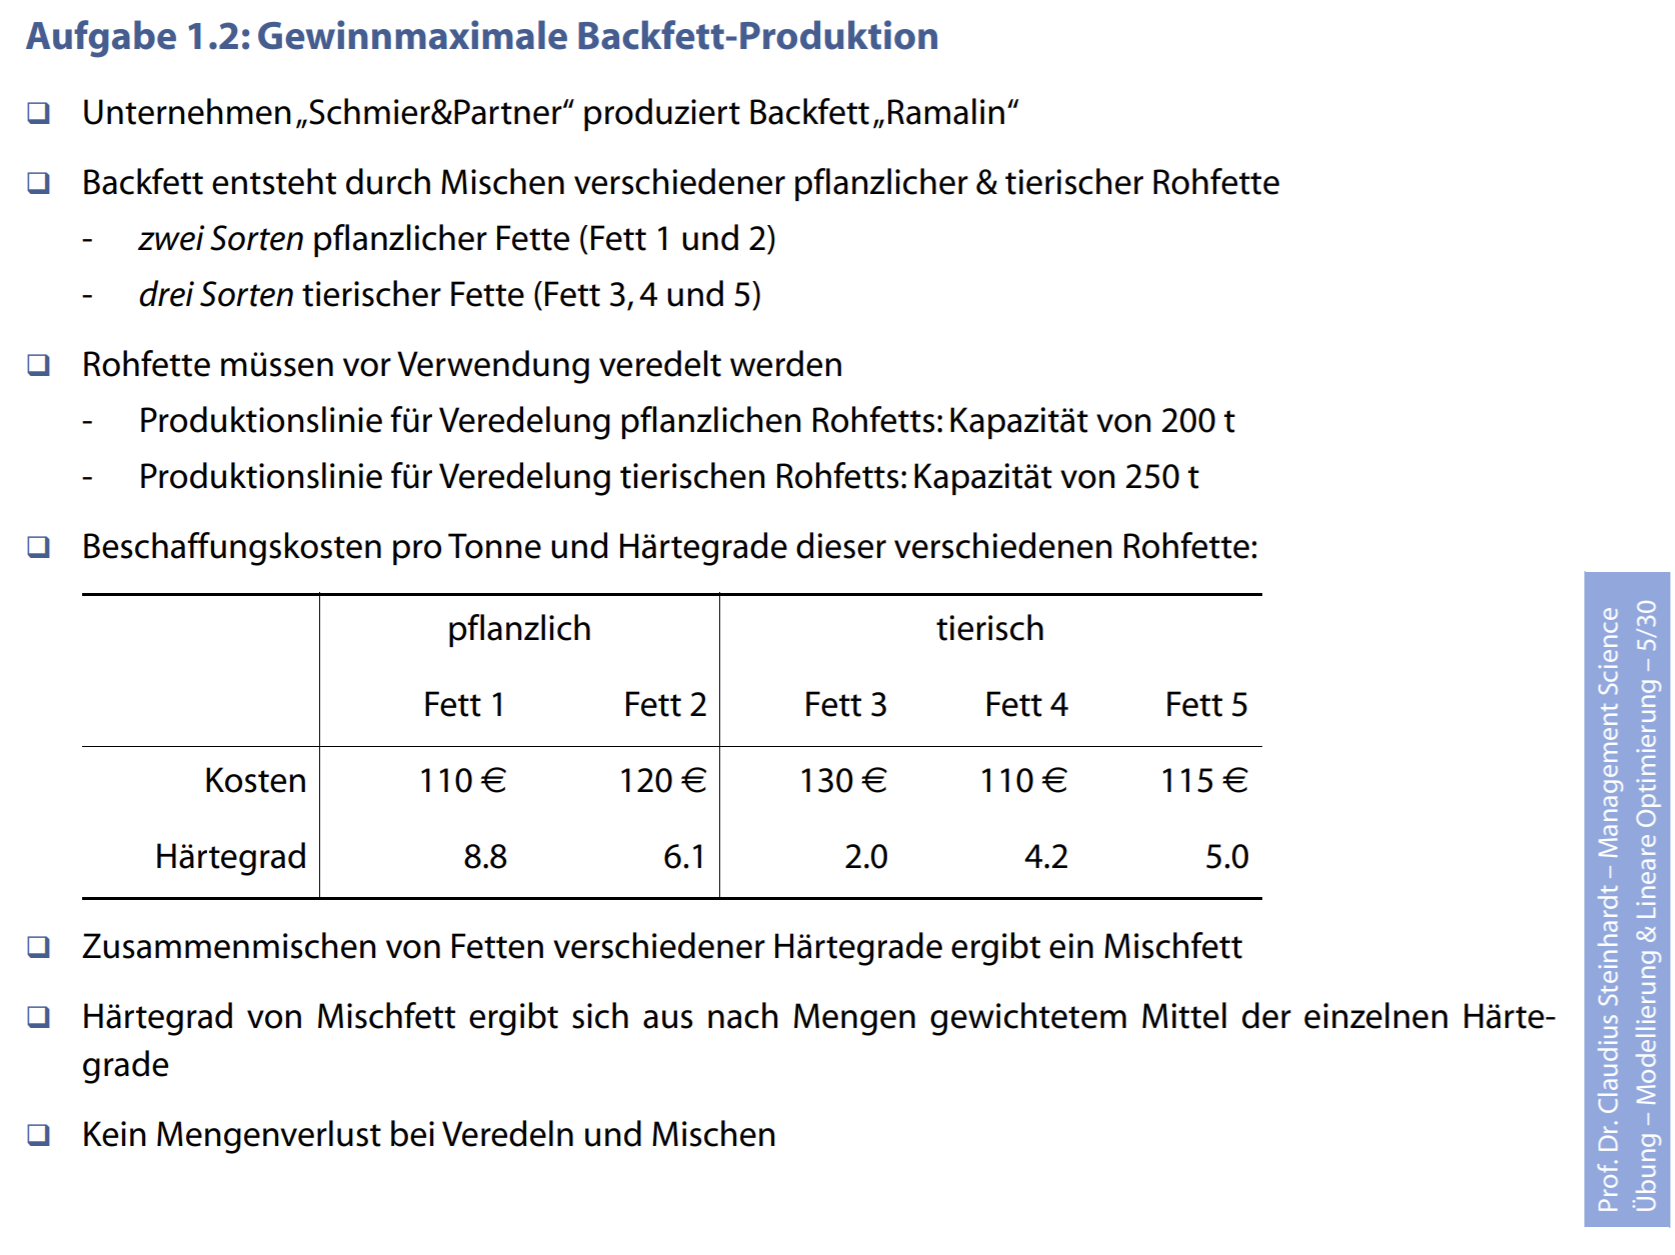

In [1]:
# Importieren der nötigen Bibliotheken
import pulp
from pulp import *

In [2]:
# Festlegen der einzelnen Parameter

# Benennung der Variablen
Fette = ["Fett1", "Fett2", "Fett3", "Fett4", "Fett5"]

# Zuordnung Pflanzlich oder Tierisch
typ = {
    'Fett1' : 'Pfl',
    'Fett2' : 'Pfl',
    'Fett3' : 'Tier',
    'Fett4' : 'Tier',
    'Fett5' : 'Tier',
}

# Zuordnung der Kosten
kosten = {
    'Fett1': 110,
    'Fett2': 120,
    'Fett3': 130,
    'Fett4': 110,
    'Fett5': 115,
}

# Zuordnen der Härte
haerte = {
    'Fett1': 8.8,
    'Fett2': 6.1,
    'Fett3': 2.0,
    'Fett4': 4.2,
    'Fett5': 5.0,
}

# Festlegen Verkaufserlös
erloes = 150

# Festlegen Kapazitäten
pflanz_kap = 200
tier_kap = 250

# Festlegen Härtegrade
min_haerte = 3
max_haerte = 6


In [3]:
# Erstellen eines neuen PulP-Modells und festlegen ob es ein Maximierungs- oder Minimierungsproblem sein soll.
prob = LpProblem("Backfett", LpMaximize)

In [4]:
# Definieren der Variablen für verbrauchte und produzierte Fette
rohfett = LpVariable.dicts("rf", Fette, 0)
ramalin = LpVariable ("Produziert")

In [5]:
# Zielfunktion
prob += erloes * ramalin - lpSum([kosten[f] * rohfett[f] for f in Fette])

In [6]:
# Unter der Nebenbedingung 1: Kapazitätsreduktion für pflanzliche Fette
prob += (lpSum(rohfett[f] for f in Fette if typ[f] == "Pfl") <= pflanz_kap, "Kapazitaetsbeschraenkung pflanzliche Fette",)

In [7]:
# Unter der Nebenbedingung 2: Kapazitätsreduktion für tierische Fette
prob += (lpSum(rohfett[f] for f in Fette if typ[f] == "Tier") <= tier_kap, "Kapazitaetsbeschraenkung tierische Fette",)

In [8]:
# Unter der Nebenbedingung 3: mindest Härtegrad 3
prob += (lpSum(haerte[f] * rohfett[f] for f in Fette) >= min_haerte*ramalin, "Mindest Haerte",)

In [9]:
# Unter der Nebenbedingung 3: max Härtegrad 6
prob += (lpSum(haerte[f] * rohfett[f] for f in Fette) <= max_haerte*ramalin, "Max Haerte",)

In [10]:
# Unter der Nebenbedingung 5: Gesammtmenge entspricht Summe der Mengen
prob += (lpSum(rohfett[f] for f in Fette) == ramalin, "Gesammtmenge",)

In [11]:
# Problem in eine .lp Datei speichern
prob.writeLP("Backfett.lp")

[Produziert, rf_Fett1, rf_Fett2, rf_Fett3, rf_Fett4, rf_Fett5]

In [12]:
# Modell lösen
prob.solve()

1

In [13]:
# Augeben des Status
print("Status:", LpStatus[prob.status])

Status: Optimal


In [14]:
# Ausgeben der Mengen für die jeweilige Variablen
for v in prob.variables():
    print(v.name, "=", v.varValue)
        
# Ausgeben Gesamtgewinn
print("Gesammtgewinn: ", value(prob.objective))

Produziert = 450.0
rf_Fett1 = 159.259
rf_Fett2 = 40.7407
rf_Fett3 = 0.0
rf_Fett4 = 250.0
rf_Fett5 = 0.0
Gesammtgewinn:  17592.626000000004
